<a href="https://colab.research.google.com/github/ldlb10-cs/MAT421/blob/main/ModuleG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21.4 Simpson’s Rule

*   Simpson’s Rule is a numerical integration method used to approximate the definite integral of a function over a specified interval. The main idea is to divide the interval into a certain number of equal sub-intervals and fit a parabola (a second-degree polynomial) through the function values at these sub-interval boundaries. By summing up the areas under these parabolas, we obtain an approximation to the actual integral.


In [2]:
def simpsons_rule(f, a, b, n=100):
    if n % 2 != 0:
        n += 1
    h = (b - a) / n
    result = f(a) + f(b)

    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            result += 2 * f(x)
        else:
            result += 4 * f(x)

    result *= h / 3.0
    return result

if __name__ == "__main__":
    import math

    def my_function(x):
        return x**2

    approximate_integral = simpsons_rule(my_function, 0, 2, n=10)
    print("Approximate integral of x^2 from 0 to 2:", approximate_integral)

    print("Exact integral of x^2 from 0 to 2 is: 8/3 ≈ 2.6667")

Approximate integral of x^2 from 0 to 2: 2.6666666666666665
Exact integral of x^2 from 0 to 2 is: 8/3 ≈ 2.6667


2.6666666666666665


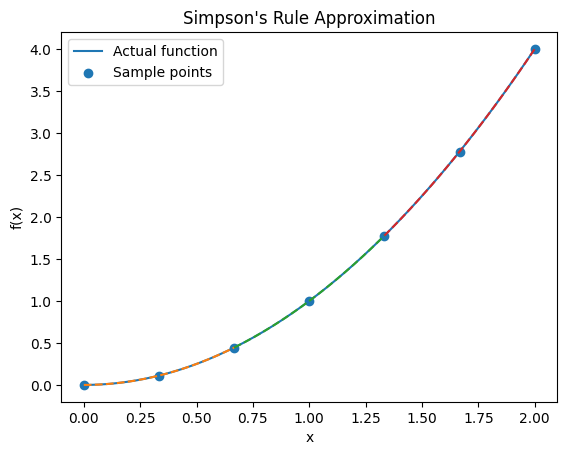

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def simpsons_rule(f, a, b, n=10):
    if n % 2 != 0:
        n += 1
    h = (b - a) / n
    x0 = f(a) + f(b)
    x1 = 0
    x2 = 0
    for i in range(1, n):
        x = a + i * h
        if i % 2 == 0:
            x2 += f(x)
        else:
            x1 += f(x)
    return (x0 + 2 * x2 + 4 * x1) * h / 3.0

def plot_simpsons_approx(f, a, b, n=10):
    if n % 2 != 0:
        n += 1
    x_dense = np.linspace(a, b, 300)
    y_dense = [f(x) for x in x_dense]
    plt.figure()
    plt.plot(x_dense, y_dense, label="Actual function")
    x_points = np.linspace(a, b, n+1)
    y_points = [f(x) for x in x_points]
    for i in range(n // 2):
        x_i = x_points[2*i]
        x_mid = x_points[2*i + 1]
        x_ip1 = x_points[2*i + 2]
        y_i = f(x_i)
        y_mid = f(x_mid)
        y_ip1 = f(x_ip1)
        coeffs = np.polyfit([x_i, x_mid, x_ip1],[y_i, y_mid, y_ip1], 2)
        local_x = np.linspace(x_i, x_ip1, 30)
        local_y = np.polyval(coeffs, local_x)
        plt.plot(local_x, local_y, linestyle="--")
    plt.scatter(x_points, y_points, marker='o', label="Sample points")
    plt.title("Simpson's Rule Approximation")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    def f(x):
        return x**2
    a_val = 0
    b_val = 2
    n_val = 6
    val = simpsons_rule(f, a_val, b_val, n_val)
    print(val)
    plot_simpsons_approx(f, a_val, b_val, n_val)




*   Simpson’s Rule typically offers higher accuracy than simpler methods like the trapezoidal rule, especially when the function to be integrated is reasonably smooth (i.e., it doesn’t exhibit rapid oscillations). It is widely used in scientific computing, engineering analysis, and other fields where numerical integration is required.

